In [5]:
import sys
sys.path.append('..')

In [6]:
%load_ext autoreload
%autoreload 2
from my_code import model as m
from my_code import layers
from my_code import functions as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data

- generate random file

In [7]:
import random

# Generate the file
with open('../data/mock_file.txt', 'w') as file:
    for _ in range(100):  # Change the number to generate more or fewer lines
        string = ''.join(random.choice(f.POSSIBLE_AMINOACIDS) for _ in range(12))
        number = random.randint(-10000, 10000)/100  # Change the range for different number values
        file.write(f'{string}  {number}\n')

In [14]:
x = [1,2,3,4,5,6,7,8,9,10]
np.random.choice(x, 3, replace=False)

tensor([1, 6, 7], requires_grad=True)

- read data

In [13]:
from pennylane import numpy as np
file_path = '../data/mock_file.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list, requires_grad=False)/100
angles_list = np.array([f.string_to_angles(string) for string in string_list], requires_grad=False)

# Print the resulting lists
print("Angles List:", angles_list)
print("Score List:", score_list)
print("shapes:", angles_list.shape, score_list.shape)

Angles List: [[2.44346095 0.34906585 1.04719755 ... 3.83972435 5.58505361 0.        ]
 [5.23598776 6.28318531 1.04719755 ... 4.53785606 0.         6.28318531]
 [1.74532925 2.0943951  0.         ... 2.44346095 2.44346095 5.23598776]
 ...
 [5.58505361 5.93411946 5.23598776 ... 5.23598776 1.04719755 4.53785606]
 [0.         0.6981317  0.6981317  ... 2.0943951  2.44346095 5.93411946]
 [2.0943951  4.53785606 5.58505361 ... 1.74532925 2.0943951  2.44346095]]
Score List: [ 0.0483  0.9696  0.9352  0.1696 -0.0565 -0.3676  0.6926 -0.4699  0.0086
 -0.8853 -0.8637 -0.3068  0.8949 -0.8099  0.7492  0.0277  0.0716  0.586
 -0.0094  0.5888 -0.35    0.5429 -0.1707  0.7042 -0.4623 -0.5786  0.4207
 -0.5338  0.0124 -0.4841  0.5782 -0.0819  0.4811 -0.1779  0.6978  0.035
  0.5674 -0.2768 -0.7163 -0.3447  0.446  -0.9923 -0.8294  0.7687 -0.9864
  0.8775 -0.1555  0.8581  0.2638 -0.8475 -0.3891  0.7229 -0.2536 -0.7344
  0.2864  0.3121 -0.8737 -0.9812 -0.0251  0.685  -0.2717  0.5423 -0.4724
  0.7369 -0.983  -0.95

- create validation data

Optimization

In [4]:

circuit_layers = [
    layers.basis_preparation(),
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.mesurament(qubits=[0])
]

In [5]:
S = m.score_predictor(n_qubits=4, data=data, circuit_layers=circuit_layers)


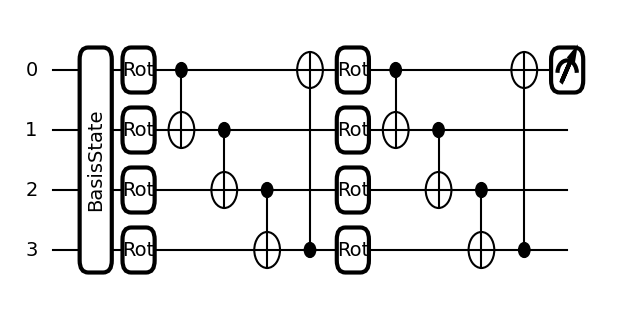

In [6]:
S.draw_circuit()

Iter:    30 | Cost: 0.0004922 | Accuracy: 1.0000000 


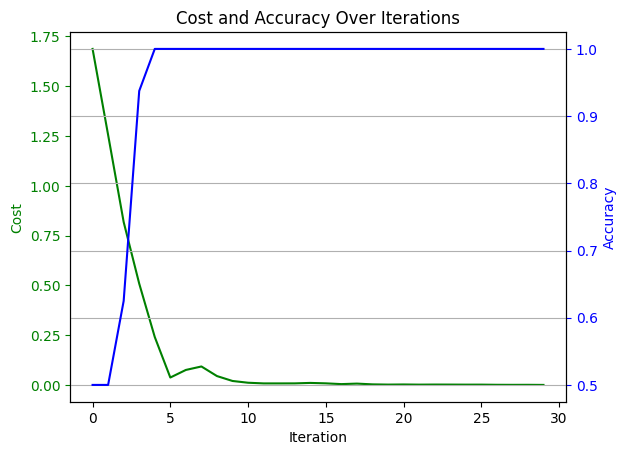

In [7]:
S.train(30)